# **INTRODUCTION**

Disini kita akan membuat sebuah Deep Image Classifier dengan metode CNN (Convolutional Neural Network)

![Screenshot 2024-09-19 155601.png](<attachment:Screenshot 2024-09-19 155601.png>)
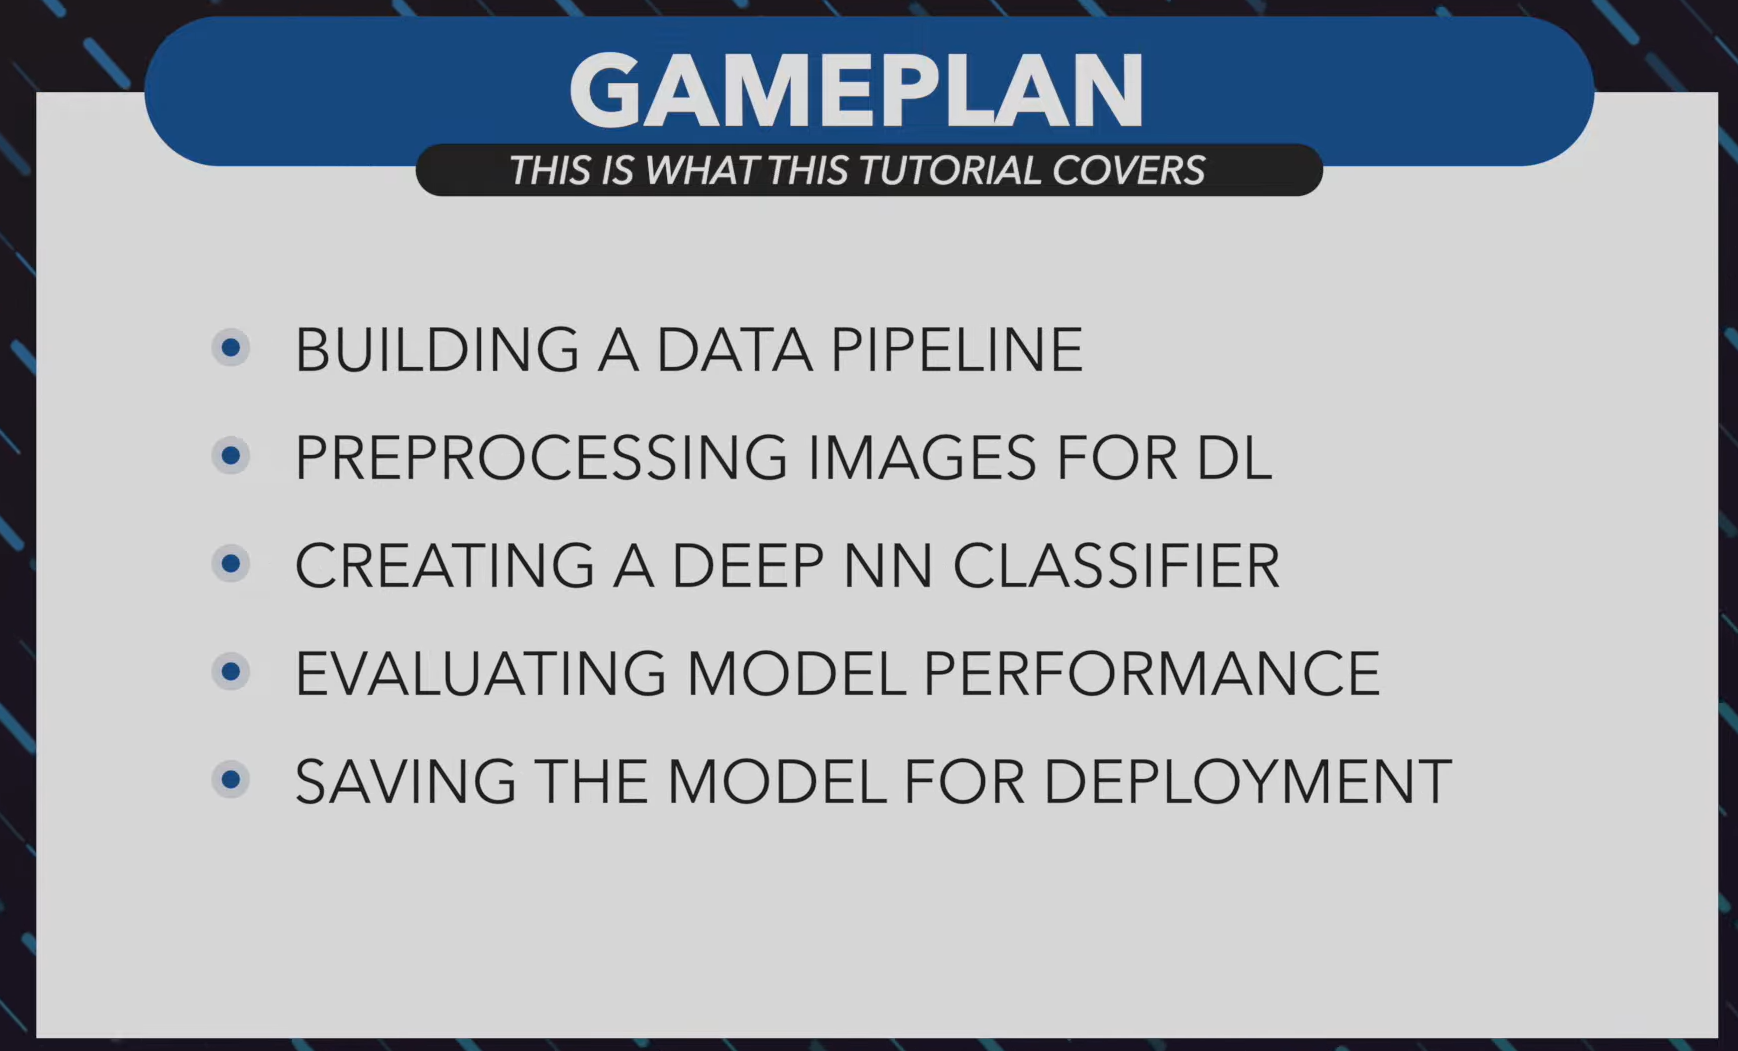

# **1. SETUP**

## 1.1 Install Dependency

Melakukan instalisasi semua fungsi yang dibutuhkan seperti : 
- Tensorflow
- Opencv-python
- Matplotlib

In [4]:
pip install opencv-python matplotlib

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   --------------------- ------------------ 4.2/7.8 MB 21.0 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 21.0 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 20.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 18.3 MB/s eta 0:00:00
Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip list

Package                      Version
---------------------------- ---------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.5.0
certifi                      2024.8.30
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.5
decorator                    5.1.1
exceptiongroup               1.2.2
executing                    2.1.0
flatbuffers                  24.3.25
fonttools                    4.53.1
gast                         0.4.0
google-auth                  2.34.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.66.1
h5py                         3.11.0
idna                         3.10
importlib_metadata           8.5.0
importlib_resources          6.4.5
ipykernel                    6.29.5
ipy

## 1.2 Mengenal Fungsi OS

fungsi OS sendiri merupakan fungsi yang memanfaatkan Operating System kita untuk menjalankan berbagai fungsi berguna seperti :

- Membuka file 📄

- Akses ke suatu direktori 📂 

- dll

In [1]:
import os

In [2]:
# Setting direktori
path = "/dataset"
fullpath = os.path.join(path)

# Dapatkan posisi direktori sekarang
current = os.getcwd()

In [26]:
fullpath

'/dataset'

In [28]:
current

'd:\\WORK\\MBC\\MAGANG'

In [8]:
# Untuk melihat isi file apa saja yang terdapat didalam suatu direktori kita
os.listdir('dataset')

['inicontoh1.txt', 'inicontoh2.txt', 'inicontoh3.txt']

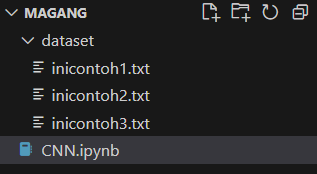

## 1.3 Setel Penggunaan Memori

Wajib untuk antisipasi error yang tidak diinginkan

In [3]:
# Library untuk Tensorflow
import tensorflow as tf

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

In [3]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
# Menghindari Memori Error (Out Of Memory) dengan menyetel penggunaan memori GPU menjadi lebih luas lagi
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

PENTING !!!

Pastikan tensorflow dapat mendeteksi GPU, jika tidak bisa silahkan ikuti tutorial disini

https://www.tensorflow.org/install/pip

Pada kasus saya, setelah mengikuti tutorial diatas silahkan ganti kernel kalian dengan versi python yang telah diinstal melalui tutorial diatas

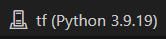

NOTE : Ada di pojok kanan atas VScode

NOTE2 : Jika sudah selesai jalankan lagi library2 yang ada diatas

## 1.4 Ez Download Many Image Dari Chrome

Caranya adalah dengan menggunakan ekstensi dari chrome, yaitu download all image.

**CARA KERJA :** 

Ekstensi ini akan mendownload semua image hasil search kita di google dengan jumlah banyak dalam sekali klik dan menyimpannya ke dalam zip

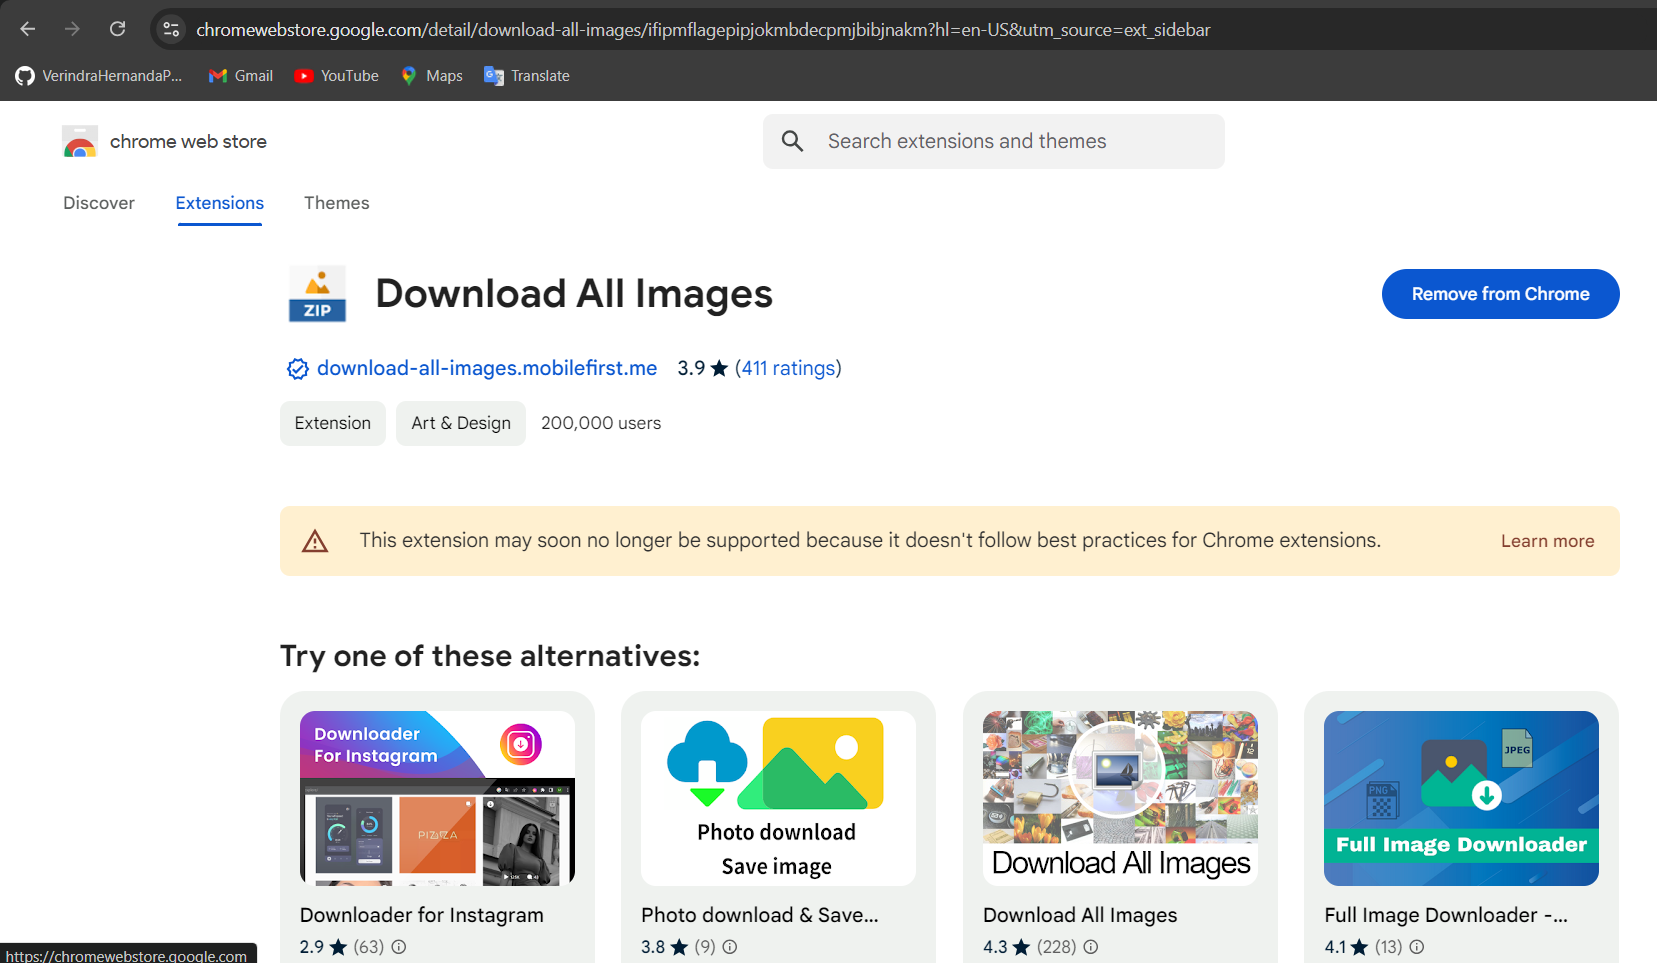

Download ekstensi disini : https://chromewebstore.google.com/detail/download-all-images/ifipmflagepipjokmbdecpmjbibjnakm?hl=en-US&utm_source=ext_sidebar

**Step :** 

1. Search gambar di google (misal: Sad People)
2. Buka ekstensi yang telah di download
3. Klik (Literally Klik doang :v)

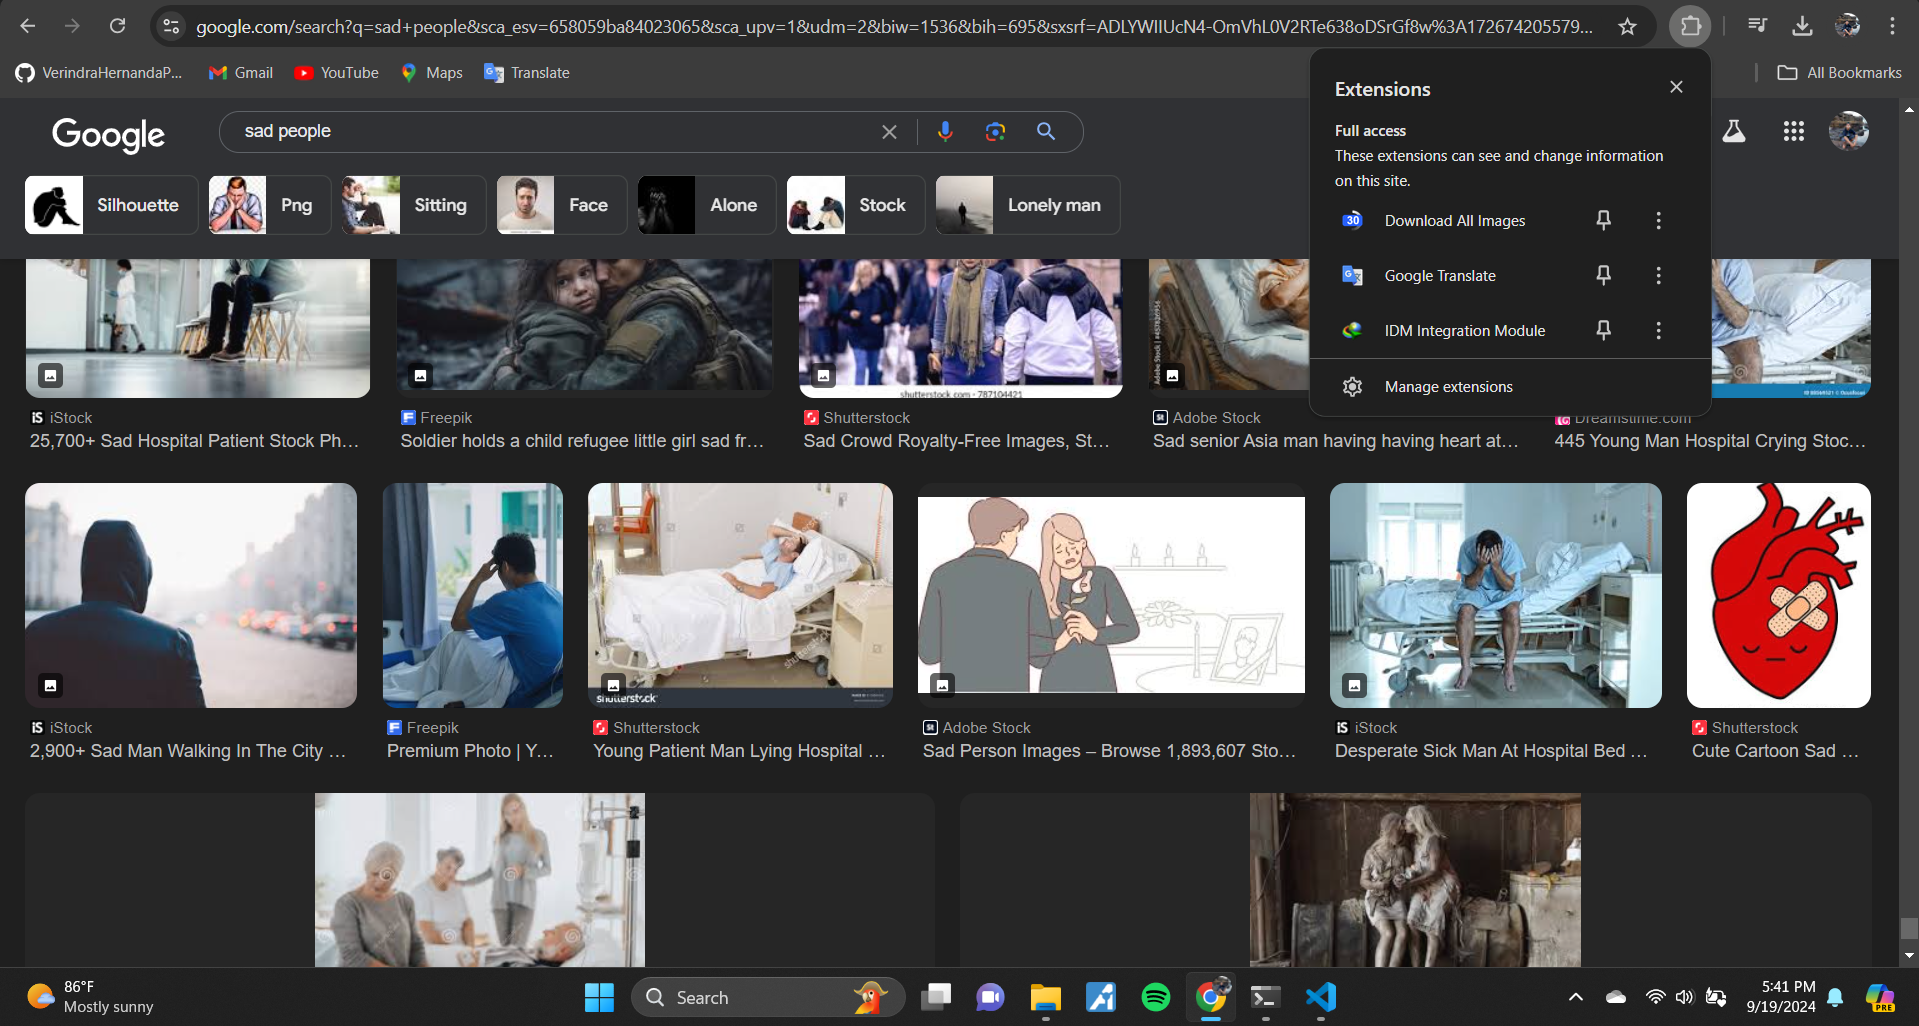

Maka setelah selesai kita tinggal download file ZIP nya dan menaruhnya di folder kita dan ekstrak file nya

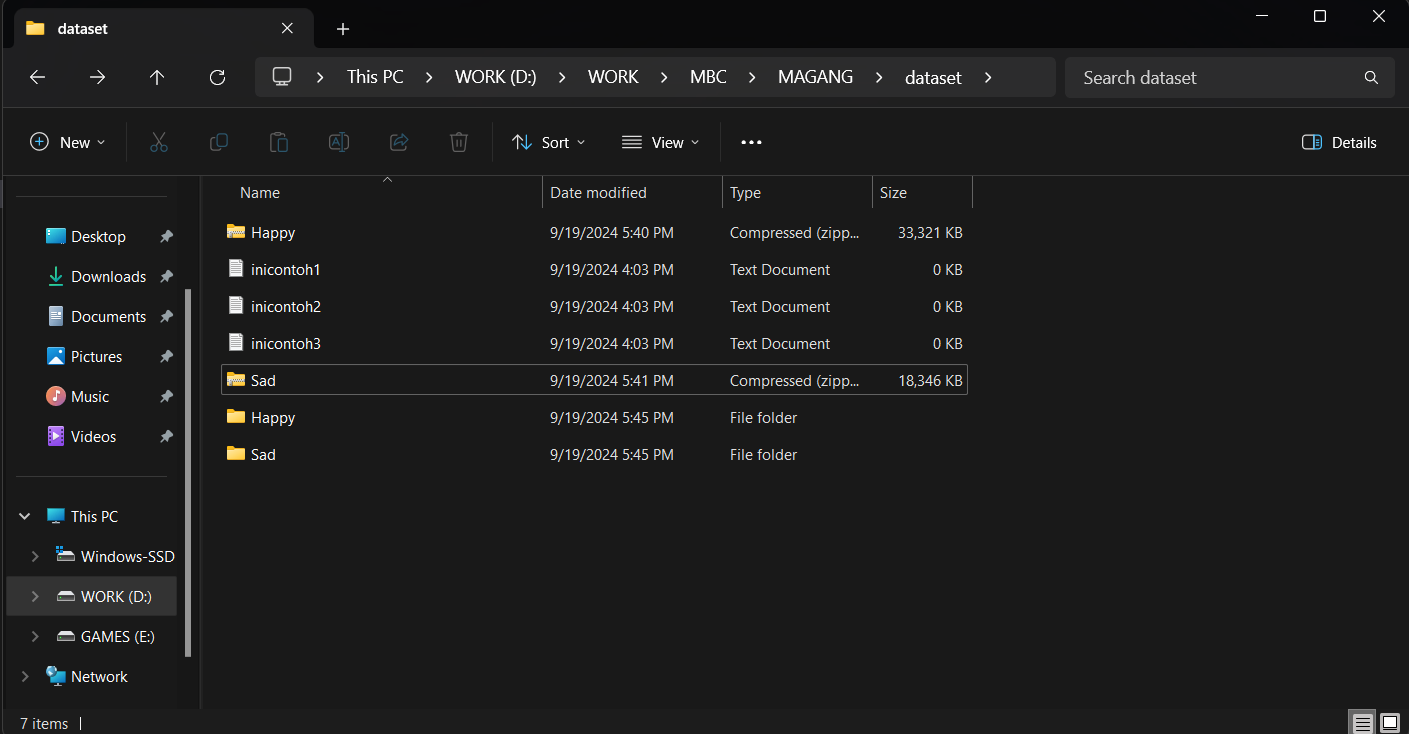

## 1.5 Hapus File Image Yang Tidak Sesuai Kriteria 

Kita disini akan melakukan Data Cleaning dengan menghapus image dengan format tidak valid (tidak bisa dibuka)

In [6]:
# Library dari OpenCV dengan fungsi-fungsi yang bertujuan dan bersifat Artificial Intelegence
import cv2

# Library untuk mengecek tipe file gambar (extension)
import imghdr

In [7]:
# Buat sebuah path untuk mengakses direktori tempat kita menyimpan gambar
dataset_dir = 'dataset'

In [8]:
os.listdir(dataset_dir)

['Happy', 'Sad']

In [9]:
# Tampilkan semua file gambar pada folder Happy
os.listdir(os.path.join(dataset_dir, 'Happy'))
#os.listdir(os.path.join(dataset_dir, 'Sad'))

['-in-svg-png-gif-file-formats--group-crowd-smiling-pack-illustrations-6983306.png',
 '05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '107307587-1695837909104-gettyimages-1446934118-istock_2022_10_17-ja1-107.jpeg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '25115.jpg',
 '35438_hd.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '360_F_709672486_C7eaa5uLXe7qjYwuX0BvPeaUSemlVzpZ.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '56f455011e0000b300705475.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '71hBPTAhIXL._AC_UF10001000_QL80_.jpg',
 'aa-happy-people.jpg',
 'behaviors-only-truly-happy-people-display.png',
 'bigstock-Senior-citizens-on-holiday-22143350.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'community-young-people-happy-together_23-214843

In [10]:
# Buat variabel untuk menyimpan sekumpulan file image dengan ekstensi yang valid
img_extension = ['jpeg', 'jpg', 'bmp', 'png']
img_extension

['jpeg', 'jpg', 'bmp', 'png']

### 1.5.1 HAPUS IMAGE DIBAWAH SIZE 10KB

Baik mungkin disini, sesuai tutorial video. Kita akan menghapus secara manual image dengen ketentuan yaitu size dibawah angka tertentu

Pada kasus ini, kita akan menghapus file img dengan size dibawah 10kb secara manual

**DO IT**

Jika sudah, maka NEXT

In [11]:
# Test Kode
# Line Kode dibawah print setiap file pada direktori folder gambar disimpan

for image_class in os.listdir(dataset_dir):
    for image in os.listdir(os.path.join(dataset_dir, image_class)):
        print(image)

-in-svg-png-gif-file-formats--group-crowd-smiling-pack-illustrations-6983306.png
05-12-21-happy-people.jpg
1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
107307587-1695837909104-gettyimages-1446934118-istock_2022_10_17-ja1-107.jpeg
170404-happy-workers-feature.jpg
1920px-face-smile.svg_.png
25115.jpg
35438_hd.jpg
360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg
360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg
360_F_709672486_C7eaa5uLXe7qjYwuX0BvPeaUSemlVzpZ.jpg
4239f3d51d092f69d529f372a37b4601.jpg
5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png
56f455011e0000b300705475.jpeg
7-principles-of-successful-and-happy-people.png
71hBPTAhIXL._AC_UF10001000_QL80_.jpg
aa-happy-people.jpg
behaviors-only-truly-happy-people-display.png
bigstock-Senior-citizens-on-holiday-22143350.jpg
business-people-succesful-celebrating-group-successful-39416686-800x500.jpg
community-young-people-happy-together_23-2148431416.jpg
Copy-of-Rustic-Female-Teen-Magazine-Cover.jpg
depositphotos_535923404-sto

In [12]:
# Test Kode
# Line Kode dibawah ini akan membaca dan mengubah gambar bertipe ext img menjadi numpy array

img = cv2.imread(os.path.join('dataset', 'Happy', 'kiKoxodyT.jpg'))
img

array([[[  1, 189, 140],
        [  1, 189, 140],
        [  1, 189, 140],
        ...,
        [  0, 153, 114],
        [  0, 153, 114],
        [  0, 153, 114]],

       [[  1, 189, 140],
        [  1, 189, 140],
        [  1, 189, 140],
        ...,
        [  0, 153, 114],
        [  0, 153, 114],
        [  0, 153, 114]],

       [[  1, 189, 140],
        [  1, 189, 140],
        [  1, 189, 140],
        ...,
        [  0, 153, 114],
        [  0, 153, 114],
        [  0, 153, 114]],

       ...,

       [[  0, 157, 117],
        [  0, 157, 117],
        [  0, 157, 117],
        ...,
        [  0, 131,  98],
        [  0, 131,  98],
        [  0, 131,  98]],

       [[  0, 157, 117],
        [  0, 157, 117],
        [  0, 157, 117],
        ...,
        [  0, 131,  98],
        [  0, 131,  98],
        [  0, 131,  98]],

       [[  0, 157, 117],
        [  0, 157, 117],
        [  0, 157, 117],
        ...,
        [  0, 131,  98],
        [  0, 131,  98],
        [  0, 131,  98]]

In [13]:
img.shape

(3844, 5125, 3)

### 1.5.2 Visualisasi Image

In [14]:
# Tampilkan image menggunakan plotlib
from matplotlib import pyplot as plt

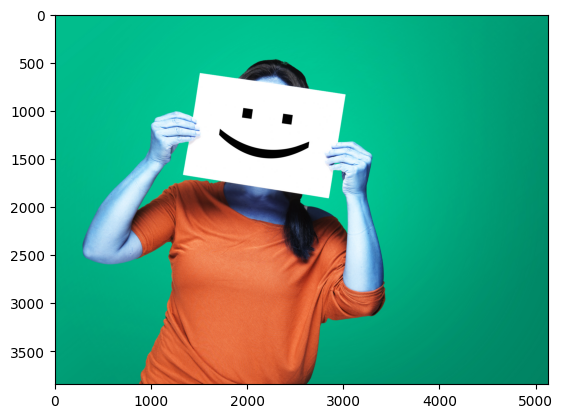

In [15]:
plt.imshow(img)
plt.show()

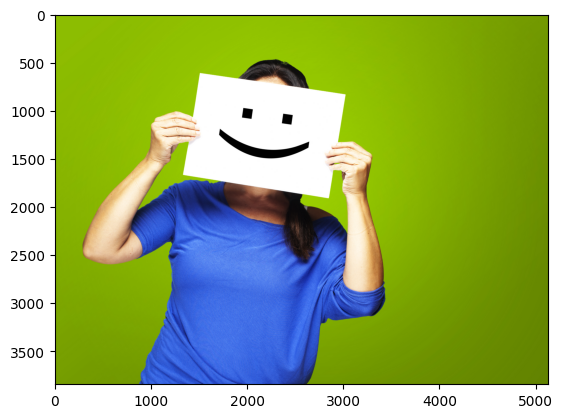

In [16]:
# Berwarna
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
# Kode Lengkap
for image_class in os.listdir(dataset_dir):
    for image in os.listdir(os.path.join(dataset_dir, image_class)):
        image_path = os.path.join(dataset_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_extension:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))
            # os.remove(image_path)

Setelah kode diatas dijalankan maka kode akan menghapus image dengan ekstensi tidak valid.

**NOTE :** Pastikan cek lagi image didalam direktori nya

**NOTE2** : Disini juga dijelaskan jumlah file pada folder Happy dan Sad berbeda (UNBALANCE DATA), maka kita nantinya juga akan melakukan BALANCING DATA dengan teknik seperti Resample namun tidak sekarang.

## 1.6 Load Data

In [18]:
# API dataset
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
@six.add_metaclass(abc.ABCMeta)
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Ten

In [19]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
# Info Spec library 'keras'
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [ ]:
# Ubah Spec library 'keras'
tf.keras.utils.image_dataset_from_directory??

In [21]:
# Membuat sebuah dataset image dengan library 'keras'
data = tf.keras.utils.image_dataset_from_directory('dataset')
#data = tf.keras.utils.image_dataset_from_directory('dataset', batch_size=8, image_size=(128,128))

Found 593 files belonging to 2 classes.


In [22]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

**Pembuatan PIPELINE**

In [23]:
# Digunakan untuk akses data dari pipeline sebagai numpy iterator
data_iterator = data.as_numpy_iterator()

**Note :** Semakin banyak data maka akan semakin efektif fungsi data_iterator

In [24]:
data_iterator

In [25]:
# Dapatkan data
batch = data_iterator.next()

In [26]:
# Jumlah Kelas
len(batch)

2

In [27]:
# Isi batch
batch

(array([[[[0.00000000e+00, 1.00000000e+00, 5.00000000e+00],
          [8.18359375e-01, 1.81835938e+00, 5.81835938e+00],
          [1.21562500e+01, 1.17617188e+01, 1.64589844e+01],
          ...,
          [1.05273438e+02, 1.47365234e+02, 1.56667969e+02],
          [1.57744141e+02, 1.97380859e+02, 2.07562500e+02],
          [8.00000000e+01, 1.18000000e+02, 1.29000000e+02]],
 
         [[0.00000000e+00, 1.00000000e+00, 5.00000000e+00],
          [1.48807144e+00, 2.48807144e+00, 6.48807144e+00],
          [1.29746094e+01, 1.25800781e+01, 1.72773438e+01],
          ...,
          [9.62794800e+01, 1.38371277e+02, 1.47674011e+02],
          [1.35419876e+02, 1.75056595e+02, 1.85238235e+02],
          [8.24550781e+01, 1.20455078e+02, 1.31455078e+02]],
 
         [[6.97265625e-01, 1.69726562e+00, 5.69726562e+00],
          [1.76337051e+00, 2.76337051e+00, 6.76337051e+00],
          [1.26700706e+01, 1.32478981e+01, 1.79451637e+01],
          ...,
          [1.14261497e+02, 1.56353302e+02, 1.6565

In [28]:
# Gambar sebagai Numpy Array [index 0]
batch[0]

array([[[[0.00000000e+00, 1.00000000e+00, 5.00000000e+00],
         [8.18359375e-01, 1.81835938e+00, 5.81835938e+00],
         [1.21562500e+01, 1.17617188e+01, 1.64589844e+01],
         ...,
         [1.05273438e+02, 1.47365234e+02, 1.56667969e+02],
         [1.57744141e+02, 1.97380859e+02, 2.07562500e+02],
         [8.00000000e+01, 1.18000000e+02, 1.29000000e+02]],

        [[0.00000000e+00, 1.00000000e+00, 5.00000000e+00],
         [1.48807144e+00, 2.48807144e+00, 6.48807144e+00],
         [1.29746094e+01, 1.25800781e+01, 1.72773438e+01],
         ...,
         [9.62794800e+01, 1.38371277e+02, 1.47674011e+02],
         [1.35419876e+02, 1.75056595e+02, 1.85238235e+02],
         [8.24550781e+01, 1.20455078e+02, 1.31455078e+02]],

        [[6.97265625e-01, 1.69726562e+00, 5.69726562e+00],
         [1.76337051e+00, 2.76337051e+00, 6.76337051e+00],
         [1.26700706e+01, 1.32478981e+01, 1.79451637e+01],
         ...,
         [1.14261497e+02, 1.56353302e+02, 1.65656036e+02],
         [

In [29]:
batch[0].shape

(32, 256, 256, 3)

In [30]:
# 0 = Happy
# 1 = Sad

# Gambar sebagai Label [index 1]
batch[1]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0])

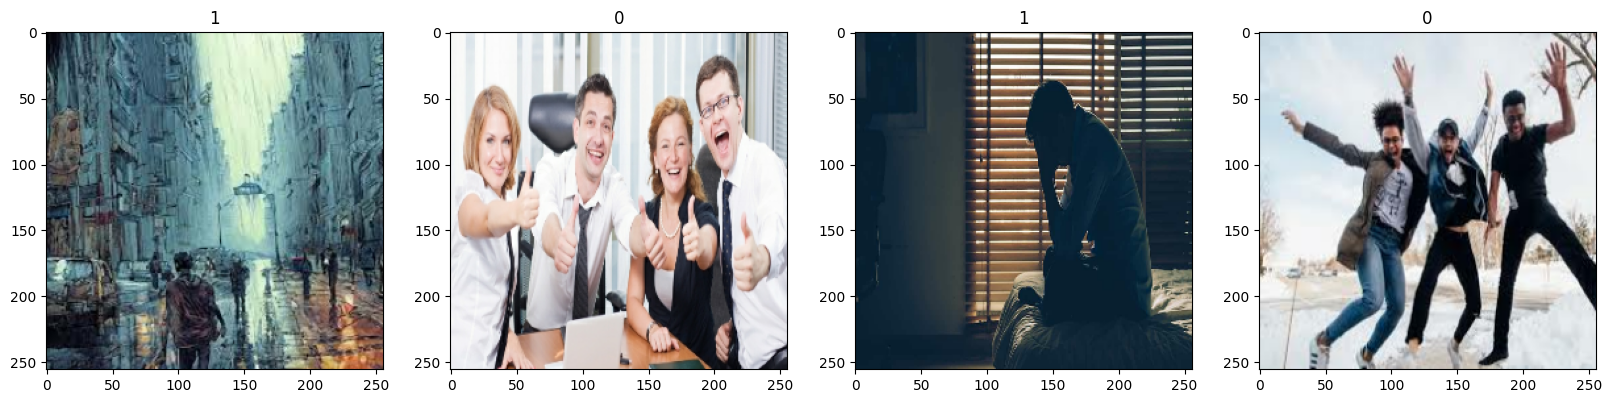

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **2. PREPROCESSING**

## 2.1 Scale Data

Disini dilakukan scaling data agar data efisien dan mudah di gunakan untuk kebutuhan machine learning

In [32]:
batch[0].max()

255.0

In [54]:
scaled_data = batch[0] / 255

In [58]:
scaled_data.min()

0.0

HERE

In [33]:
data = data.map(lambda x, y: (x/255, y))

Penjelasan Kode diatas :

- data.map = melakukan transformasi pada pipeline
- dlambda = untuk bisa melakukan transformation
- dx = representasi image (independent features)
- dy = target variabel
- dx/255 = scaling

More Code here :
https://www.tensorflow.org/api_docs

In [34]:
data.as_numpy_iterator().next()[0].min()

0.0

In [35]:
scaled_iterator = data.as_numpy_iterator()

In [36]:
scaled_iterator.next()[0].max()

1.0

In [37]:
batch = scaled_iterator.next()

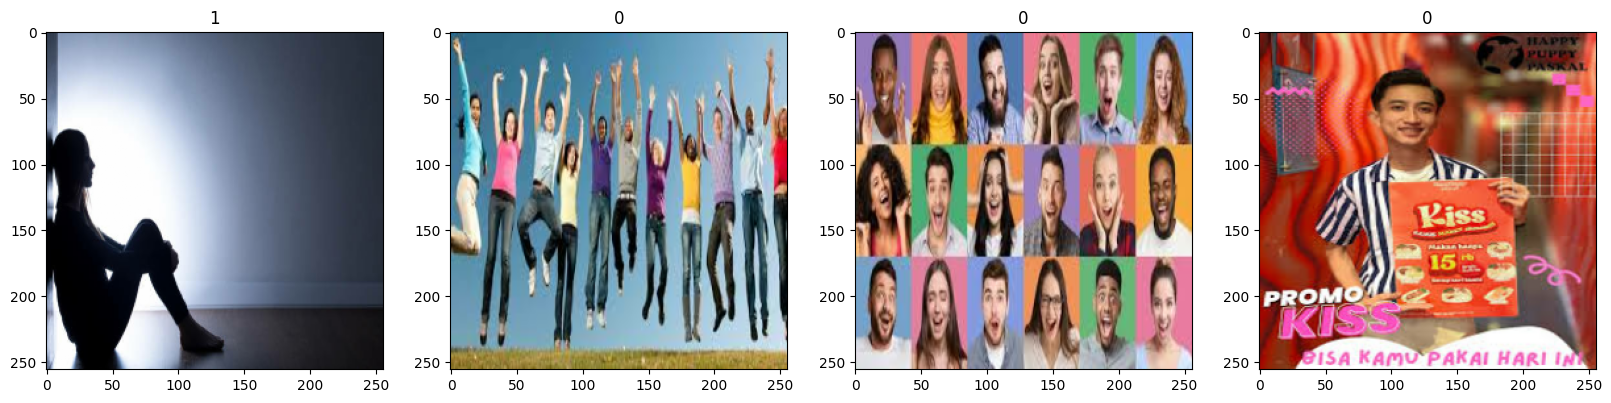

In [38]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.1 Split Data

In [39]:
# Jumlah data
len(data)

19

In [40]:
# 70% Train Size
train_size = int(len(data)*.7)

# 20% Validation Size
val_size = int(len(data)*.2)+1

# 10% Test Size
test_size = int(len(data)*.1)+1

In [41]:
test_size

2

In [42]:
# Pastikan sama dengan len(data)
train_size + val_size + test_size

19

In [43]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Penjelasan Kode diatas :

- .take = berapa banyak data yang akan kita ambil untuk partisi
- .skip = skip data yang telah dialokasikan pada partisi train

More Code here :
https://www.tensorflow.org/api_docs

In [44]:
len(test)

2

# **3. DEEP MODEL**

## 3.1 Building

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

Penjelasan Kode diatas :

- Conv2D = Nueral Network Image 2D
- MaxPooling2D = Untuk Kondensasi image
- ...
- Dropout = untuk Regularization

More Code here :
https://www.tensorflow.org/api_docs

In [46]:
# Chain
#model = Sequential([Conv2D(), ])

model = Sequential()

In [48]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Penjelasan Kode diatas :

1. (Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))

- 16 = Filter
- (3,3) = Pembagian Filter
- 1 = Pengambilan Filter (1 persatu)
- activation='relu' = Konversi semua value negatif menjadi 0
- input_shape=(256,256,3) = mengubah shape img sesuai parameter (256 px, 256 px, 3 channel deep)


- activation='sigmoid' = Mengambil semua data dan menyalurkannya ke fungsi untuk dimodify (custom)

More Code here :
https://www.tensorflow.org/api_docs

In [49]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

Penjelasan Kode diatas :

- 'adam' = salah satu optimizer
- loss=tf.losses.BinaryCrossentropy() = Atur Loss
- metrics=['accuracy'] = fokus metrix

More Code here :
https://www.tensorflow.org/api_docs

In [ ]:
# List Optimizers
tf.optimizers.

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 3.2 Train

In [52]:
logdir = 'logs'

In [53]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [54]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
13/13 [==============================] - 12s 179ms/step - loss: 0.7137 - accuracy: 0.6226 - val_loss: 0.6174 - val_accuracy: 0.6328
Epoch 2/20
13/13 [==============================] - 2s 156ms/step - loss: 0.5751 - accuracy: 0.6995 - val_loss: 0.5251 - val_accuracy: 0.7578
Epoch 3/20
13/13 [==============================] - 2s 142ms/step - loss: 0.5326 - accuracy: 0.7620 - val_loss: 0.4844 - val_accuracy: 0.8203
Epoch 4/20
13/13 [==============================] - 2s 141ms/step - loss: 0.4169 - accuracy: 0.8293 - val_loss: 0.3339 - val_accuracy: 0.8438
Epoch 5/20
13/13 [==============================] - 2s 142ms/step - loss: 0.3575 - accuracy: 0.8510 - val_loss: 0.2939 - val_accuracy: 0.9297
Epoch 6/20
13/13 [==============================] - 2s 140ms/step - loss: 0.2918 - accuracy: 0.8774 - val_loss: 0.2403 - val_accuracy: 0.9141
Epoch 7/20
13/13 [==============================] - 2s 141ms/step - loss: 0.2502 - accuracy: 0.8918 - val_loss: 0.1924 - val_accuracy: 0.9453
Epoch

In [57]:
hist.history

{'loss': [0.7137116193771362,
  0.5751079320907593,
  0.5326195359230042,
  0.416855126619339,
  0.3574865758419037,
  0.29178386926651,
  0.25024744868278503,
  0.18651911616325378,
  0.15109556913375854,
  0.11513695120811462,
  0.062180254608392715,
  0.059008240699768066,
  0.031572576612234116,
  0.02010800503194332,
  0.0073203821666538715,
  0.0075919972732663155,
  0.0051550427451729774,
  0.003169106086716056,
  0.002264278708025813,
  0.0014491828624159098],
 'accuracy': [0.6225961446762085,
  0.6995192170143127,
  0.7620192170143127,
  0.8293269276618958,
  0.8509615659713745,
  0.8774038553237915,
  0.8918269276618958,
  0.9302884340286255,
  0.9447115659713745,
  0.9711538553237915,
  0.9879807829856873,
  0.9855769276618958,
  0.9975961446762085,
  0.9927884340286255,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6174191236495972,
  0.5251233577728271,
  0.48438116908073425,
  0.3339431583881378,
  0.29389142990112305,
  0.24031034111976624,
  0.1923933923244

## 3.3 Plot Perfomance

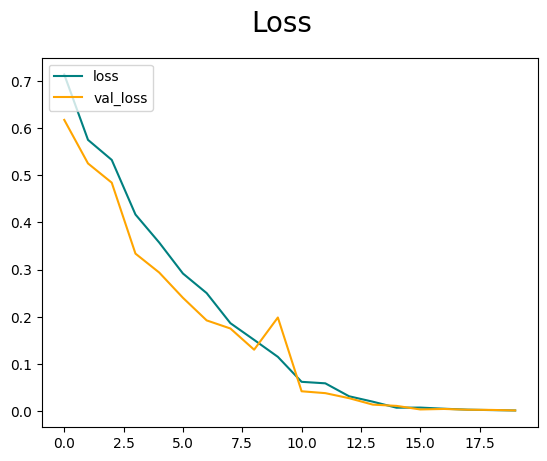

In [58]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

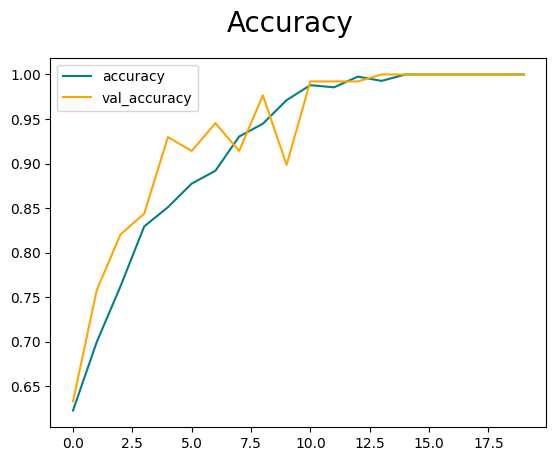

In [59]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **4. EVALUATE PERFOMANCE**

## 4.1 Evaluate

In [60]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [61]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [62]:
len(test)

2

In [64]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 414ms/step


In [65]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


## 4.2 Test

In [66]:
import cv2

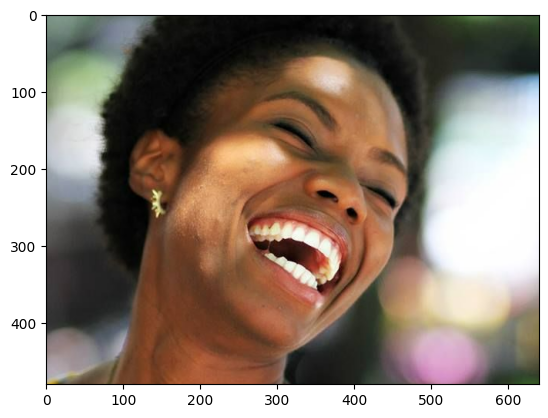

In [100]:
img = cv2.imread('happytest3.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

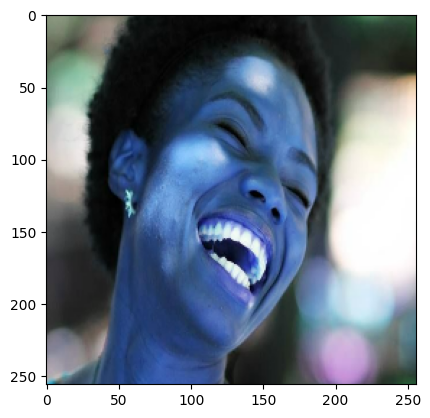

In [101]:
# Resize img sesuai ketentuan model
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [83]:
resize.shape

TensorShape([256, 256, 3])

In [84]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [102]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 23ms/step


In [103]:
 yhat

array([[0.48264557]], dtype=float32)

In [104]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# **5. SAVE MODEL**

## 5.1 Save the Model

In [105]:
from tensorflow.keras.models import load_model

In [106]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [107]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [108]:
new_model

In [109]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 59ms/step


In [110]:
if yhat_new > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
